In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Load datasets
load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation1.xlsx')
weather_data2 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation2.xlsx')
weather_data3 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\WeatherStation3.xlsx')

target = 'WEST'

<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\death\AppData\Local\Temp\ipykernel_18876\791961918.py:15: SyntaxWarning: invalid escape sequence '\d'
  load_data = pd.read_excel('C:\\Users\death\\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETWORK\\DataSet\\LoadTexasERCOT.xlsx')
C:\Users\death\AppData\Local\Temp\ipykernel_18876\791961918.py:16: SyntaxWarning: invalid escape sequence '\D'
  weather_data1 = pd.read_excel('C:\\Users\\death\Desktop\\btech proj\\DATA SET USED IN THE CONFERENCE PAPER TITLED SHORT-TERM LOAD FORECASTING USING AN LSTM NEURAL NETW

In [ ]:
weather_data1.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,39.19,6,950
1,2012,1,1,1,30,44.45,5,950
2,2012,1,1,2,30,53.94,4,950
3,2012,1,1,3,30,63.77,2,960
4,2012,1,1,4,30,71.93,2,960


In [ ]:
weather_data3.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,42.80,6,960
1,2012,1,1,1,30,56.15,5,960
2,2012,1,1,2,30,63.72,3,960
3,2012,1,1,3,30,69.80,2,960
4,2012,1,1,4,30,74.92,1,970


In [ ]:

weather_data2.head(5)

,Year,Month,Day,Hour,Minute,Relative Humidity,Temperature,Pressure
0,2012,1,1,0,30,63.98,8,950
1,2012,1,1,1,30,49.59,6,950
2,2012,1,1,2,30,46.28,4,950
3,2012,1,1,3,30,52.89,3,960
4,2012,1,1,4,30,62.81,3,960


In [ ]:
import pandas as pd

# Assuming weather_data1 is already defined and contains the necessary data

# Print column names to verify
print("Columns in weather_data1:", weather_data1.columns)

# Step 1: Preprocessing
# Convert to Datetime
weather_data1['DateTime'] = pd.to_datetime(weather_data1[['Year', 'Month', 'Day', 'Hour' ]])

# Drop the original columns
weather_data1.drop(columns=['Year', 'Month', 'Day', 'Hour' ], inplace=True)

# Display the first few rows to verify the changes
weather_data1.head()

Columns in weather_data1: Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Relative Humidity',
       'Temperature', 'Pressure'],
      dtype='object')


,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,30,39.19,6,950,2012-01-01 00:00:00
1,30,44.45,5,950,2012-01-01 01:00:00
2,30,53.94,4,950,2012-01-01 02:00:00
3,30,63.77,2,960,2012-01-01 03:00:00
4,30,71.93,2,960,2012-01-01 04:00:00


In [ ]:
weather_data3['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data3.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
weather_data2['DateTime'] = pd.to_datetime(weather_data2[['Year', 'Month', 'Day', 'Hour']])
weather_data2.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)
load_data.drop(columns=[col for col in load_data.columns if col not in ['Hour_End', target]], inplace=True)


In [ ]:
merged_data = pd.merge(load_data, weather_data1, left_on='Hour_End', right_on='DateTime')
merged_data

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,63.77,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,79.76,0,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,48.63,6,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,25.26,12,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,23.44,12,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,95.18,4,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,86.81,7,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,83.39,6,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,72.86,-2,950,2015-12-31 18:00:00


In [ ]:
merged_data2 = pd.merge(load_data, weather_data3, left_on='Hour_End', right_on='DateTime')
merged_data2

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,69.80,2,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,75.63,0,970,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,45.26,6,970,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,29.36,12,970,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,27.66,11,970,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,100.00,1,960,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,96.39,4,960,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,89.95,4,960,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,70.93,-2,960,2015-12-31 18:00:00


In [ ]:
merged_data3 = pd.merge(load_data, weather_data2, left_on='Hour_End', right_on='DateTime' )
merged_data3

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure,DateTime
0,2012-01-01 03:00:00,840.902848,30,52.89,3,960,2012-01-01 03:00:00
1,2012-01-01 06:00:00,892.341115,30,73.31,1,960,2012-01-01 06:00:00
2,2012-01-01 09:00:00,1009.202331,30,46.52,7,960,2012-01-01 09:00:00
3,2012-01-01 12:00:00,964.065395,30,25.48,13,960,2012-01-01 12:00:00
4,2012-01-01 15:00:00,895.595594,30,25.14,13,960,2012-01-01 15:00:00
...,...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,85.43,6,950,2015-12-31 09:00:00
11683,2015-12-31 12:00:00,1309.101953,30,70.70,8,950,2015-12-31 12:00:00
11684,2015-12-31 15:00:00,1183.585632,30,67.66,8,950,2015-12-31 15:00:00
11685,2015-12-31 18:00:00,1229.206403,30,73.87,0,950,2015-12-31 18:00:00


In [ ]:
# stack all 3 mergered dataframes
final_data = pd.concat([merged_data, merged_data2, merged_data3], axis=0)
merged_data  = final_data
#drop the DateTime column
merged_data.drop(columns=['DateTime'], inplace=True)
merged_data

,Hour_End,WEST,Minute,Relative Humidity,Temperature,Pressure
0,2012-01-01 03:00:00,840.902848,30,63.77,2,960
1,2012-01-01 06:00:00,892.341115,30,79.76,0,960
2,2012-01-01 09:00:00,1009.202331,30,48.63,6,960
3,2012-01-01 12:00:00,964.065395,30,25.26,12,960
4,2012-01-01 15:00:00,895.595594,30,23.44,12,960
...,...,...,...,...,...,...
11682,2015-12-31 09:00:00,1366.707739,30,85.43,6,950
11683,2015-12-31 12:00:00,1309.101953,30,70.70,8,950
11684,2015-12-31 15:00:00,1183.585632,30,67.66,8,950
11685,2015-12-31 18:00:00,1229.206403,30,73.87,0,950


In [ ]:
import holidays

us_holidays = holidays.US(years=merged_data['Hour_End'].dt.year.unique(), state='TX')
merged_data['HolidayFlag'] = merged_data['Hour_End'].apply(lambda x: 1 if x in us_holidays else 0)
holiday_flag_1_count = merged_data['HolidayFlag'].sum()
holiday_flag_0_count = len(merged_data) - holiday_flag_1_count

print(f"Number of rows where HolidayFlag_1 is 1: {holiday_flag_1_count}")
print(f"Number of rows where HolidayFlag_1 is 0: {holiday_flag_0_count}")

Number of rows where HolidayFlag_1 is 1: 1869
Number of rows where HolidayFlag_1 is 0: 33192


## Creating Input features


In [ ]:
import pandas as pd

# Assuming 'merged_data' DataFrame has 'Hour_End' column as datetime object
# Example: merged_data['Hour_End'] = pd.to_datetime(merged_data['Hour_End'])

# Step 1: Add 'Time of Day Index' (Hour of the day)
merged_data['TimeOfDayIndex'] = merged_data['Hour_End'].dt.hour

# Step 2: Add 'Day of the Week Index' (0 = Monday, 6 = Sunday)
merged_data['DayOfWeekIndex'] = merged_data['Hour_End'].dt.dayofweek

# Step 3: Add 'Holiday Flag' using the 'holidays' library for U.S. and Texas holidays

# Step 4: Manually create 24 columns for 'TimeOfDayIndex' and 7 columns for 'DayOfWeekIndex'
for hour in range(24):
    merged_data[f'TimeOfDay_{hour}'] = (merged_data['TimeOfDayIndex'] == hour).astype(int)

for day in range(7):
    merged_data[f'DayOfWeek_{day}'] = (merged_data['DayOfWeekIndex'] == day).astype(int)

# Drop the original 'TimeOfDayIndex' and 'DayOfWeekIndex' columns
merged_data.drop(columns=['TimeOfDayIndex', 'DayOfWeekIndex'], inplace=True)

# Drop 'DateTime' column if it exists
if 'DateTime' in merged_data.columns:
    merged_data.drop(['DateTime'], axis=1, inplace=True)

# Display the first few rows to verify the manually created features
print(merged_data.head())

# Count the number of rows where 'HolidayFlag' is 1 and 0
# Display the column names to verify the new columns
print('Column names are:\n' + ', '.join(merged_data.columns))
print('shape of the data is:', merged_data.shape)

             Hour_End         WEST  Minute  Relative Humidity  Temperature  \
0 2012-01-01 03:00:00   840.902848      30              63.77            2   
1 2012-01-01 06:00:00   892.341115      30              79.76            0   
2 2012-01-01 09:00:00  1009.202331      30              48.63            6   
3 2012-01-01 12:00:00   964.065395      30              25.26           12   
4 2012-01-01 15:00:00   895.595594      30              23.44           12   

   Pressure  HolidayFlag  TimeOfDay_0  TimeOfDay_1  TimeOfDay_2  ...  \
0       960            1            0            0            0  ...   
1       960            1            0            0            0  ...   
2       960            1            0            0            0  ...   
3       960            1            0            0            0  ...   
4       960            1            0            0            0  ...   

   TimeOfDay_21  TimeOfDay_22  TimeOfDay_23  DayOfWeek_0  DayOfWeek_1  \
0             0          

## Building the l ass tm model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Exclude the datetime and target columns before scaling
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(merged_data.drop(columns=['Hour_End', target]))

# Scale the target column separately
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(merged_data[[target]])

# Convert scaled features back to DataFrame and re-include the 'Hour_End' and scaled target columns
scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop(['Hour_End', target]))
scaled_data[target] = scaled_target
scaled_data['Hour_End'] = merged_data['Hour_End'].values

# Print dtype of all columns
print(scaled_data.dtypes)
scaled_data.head(5)

Minute                      float64
Relative Humidity           float64
Temperature                 float64
Pressure                    float64
HolidayFlag                 float64
TimeOfDay_0                 float64
TimeOfDay_1                 float64
TimeOfDay_2                 float64
TimeOfDay_3                 float64
TimeOfDay_4                 float64
TimeOfDay_5                 float64
TimeOfDay_6                 float64
TimeOfDay_7                 float64
TimeOfDay_8                 float64
TimeOfDay_9                 float64
TimeOfDay_10                float64
TimeOfDay_11                float64
TimeOfDay_12                float64
TimeOfDay_13                float64
TimeOfDay_14                float64
TimeOfDay_15                float64
TimeOfDay_16                float64
TimeOfDay_17                float64
TimeOfDay_18                float64
TimeOfDay_19                float64
TimeOfDay_20                float64
TimeOfDay_21                float64
TimeOfDay_22                

,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,TimeOfDay_4,...,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,WEST,Hour_End
0,0.0,0.608197,0.215686,0.6,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.168452,2012-01-01 03:00:00
1,0.0,0.781118,0.176471,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.209891,2012-01-01 06:00:00
2,0.0,0.444468,0.294118,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.304035,2012-01-01 09:00:00
3,0.0,0.191738,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.267673,2012-01-01 12:00:00
4,0.0,0.172056,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.212513,2012-01-01 15:00:00


In [ ]:
def split_data(df):
    # Ensure hour_end is a datetime column
    df['Hour_End'] = pd.to_datetime(df['Hour_End'])
    
    # Split the data
    train = df[df['Hour_End'].dt.year != 2015]
    test = df[df['Hour_End'].dt.year == 2015]
    
    return train, test
tr , te = split_data(scaled_data)
print(tr.shape)
#drop the Hour_End column from tr and te
tr.drop(columns=['Hour_End'], inplace=True)
te.drop(columns=['Hour_End'], inplace=True)
tr.head(5)

(26301, 38)


C:\Users\death\AppData\Local\Temp\ipykernel_18876\860874687.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr.drop(columns=['Hour_End'], inplace=True)
C:\Users\death\AppData\Local\Temp\ipykernel_18876\860874687.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te.drop(columns=['Hour_End'], inplace=True)


,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,TimeOfDay_4,...,TimeOfDay_22,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,WEST
0,0.0,0.608197,0.215686,0.6,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.168452
1,0.0,0.781118,0.176471,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.209891
2,0.0,0.444468,0.294118,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.304035
3,0.0,0.191738,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.267673
4,0.0,0.172056,0.411765,0.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.212513


In [ ]:
print(te.shape)
te.head(5)

(8760, 37)


,Minute,Relative Humidity,Temperature,Pressure,HolidayFlag,TimeOfDay_0,TimeOfDay_1,TimeOfDay_2,TimeOfDay_3,TimeOfDay_4,...,TimeOfDay_22,TimeOfDay_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,WEST
8767,0.0,0.785660,0.137255,0.4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.703001
8768,0.0,0.847734,0.156863,0.4,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.643432
8769,0.0,0.878880,0.156863,0.4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.657032
8770,0.0,0.774630,0.176471,0.4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.718336
8771,0.0,0.854439,0.196078,0.4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.742422


In [ ]:
# scaled_data = scaled_data.astype(np.float64)

# Function to create sequences
def create_sequences(data, time_steps, target):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].drop(columns=[target]).values)
        y.append(data.iloc[i + time_steps][target])
    return np.array(X), np.array(y)

# Assuming scaled_data is already defined and contains the necessary data
time_steps = 18  # Example time steps
target = target
X_train, y_train = create_sequences(tr, time_steps, target)
X_test,  y_test = create_sequences(te, time_steps, target)



# Ensure all data is of type float64
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def train_and_evaluate_model(X_train, y_train, X_test, y_test, target_scaler, max_epochs=50, batch_size=32):
    # Initialize variables to store the best results
    best_train_mae = float('inf')
    best_test_mae = float('inf')
    best_train_rmse = float('inf')
    best_test_rmse = float('inf')
    best_train_r2 = float('-inf')
    best_test_r2 = float('-inf')
    best_model = None
    best_epoch = 0
    best_test_predictions = None
    best_train_predictions = None
    # Loop through the number of epochs
    for epoch in [6,7,8,20,30,50]:
        # Define the model
        model = Sequential()
        model.add(LSTM(55, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(50))
        model.add(Dropout(0.2))
        model.add(Dense(1))  # Output layer for load prediction
        
        # Compile the model
        model.compile(optimizer='adam', loss='mse')
        
        # Train the model for the current number of epochs
        model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
        
        # Make predictions
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        
        # Inverse transform the predictions and target variables
        train_predictions = target_scaler.inverse_transform(train_predictions)
        test_predictions = target_scaler.inverse_transform(test_predictions)
        y_train_inv = target_scaler.inverse_transform(y_train.reshape(-1, 1))
        y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
        
        # Calculate metrics
        train_mae = mean_absolute_error(y_train_inv, train_predictions)
        test_mae = mean_absolute_error(y_test_inv, test_predictions)
        train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predictions))
        test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
        train_r2 = r2_score(y_train_inv, train_predictions)
        test_r2 = r2_score(y_test_inv, test_predictions)
        
        # Update best metrics and model if applicable
        if train_mae < best_train_mae and test_mae < best_test_mae:
            best_train_mae = train_mae
            best_test_mae = test_mae
            best_train_rmse = train_rmse
            best_test_rmse = test_rmse
            best_train_r2 = train_r2
            best_test_r2 = test_r2
            best_model = model
            best_epoch = epoch
            best_train_predictions = train_predictions
            best_test_predictions = test_predictions

        print(f"Epoch {epoch}: Train MAE = {train_mae:.4f}, Test MAE = {test_mae:.4f}")
        print(f"Epoch {epoch}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")
        print(f"Epoch {epoch}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

    # Final evaluation metrics
    print(f"Best Epoch: {best_epoch}")
    print(f"Best Train MAE: {best_train_mae:.4f}")
    print(f"Best Test MAE: {best_test_mae:.4f}")
    print(f"Best Train RMSE: {best_train_rmse:.4f}")
    print(f"Best Test RMSE: {best_test_rmse:.4f}")
    print(f"Best Train R²: {best_train_r2:.4f}")
    print(f"Best Test R²: {best_test_r2:.4f}")

    # Return the best model and the metrics
    return best_model, best_train_mae, best_test_mae, best_train_rmse, best_test_rmse, best_train_r2, best_test_r2 , best_train_predictions, best_test_predictions

# Example usage:
model, train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2 , train_predictions , test_predictions = train_and_evaluate_model(X_train, y_train, X_test, y_test, target_scaler, max_epochs=50, batch_size=32)


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 5: Train MAE = 53.1352, Test MAE = 67.3488
Epoch 5: Train RMSE = 70.2664, Test RMSE = 88.3783
Epoch 5: Train R² = 0.9042, Test R² = 0.8580


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 8: Train MAE = 48.8722, Test MAE = 54.5315
Epoch 8: Train RMSE = 64.6708, Test RMSE = 74.5257
Epoch 8: Train R² = 0.9188, Test R² = 0.8990


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 10: Train MAE = 46.9618, Test MAE = 56.1664
Epoch 10: Train RMSE = 61.7240, Test RMSE = 75.2716
Epoch 10: Train R² = 0.9260, Test R² = 0.8970


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 15: Train MAE = 45.6793, Test MAE = 64.1449
Epoch 15: Train RMSE = 60.1428, Test RMSE = 81.9453
Epoch 15: Train R² = 0.9298, Test R² = 0.8779


C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 20: Train MAE = 42.8907, Test MAE = 61.6580
Epoch 20: Train RMSE = 56.1144, Test RMSE = 80.3664
Epoch 20: Train R² = 0.9389, Test R² = 0.8826
Best Epoch: 8
Best Train MAE: 48.8722
Best Test MAE: 54.5315
Best Train RMSE: 64.6708
Best Test RMSE: 74.5257
Best Train R²: 0.9188
Best Test R²: 0.8990


In [ ]:
# # Define the model
# model = Sequential()
# model.add(LSTM(55, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(1))  # Output layer for load prediction

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(X_train, y_train, epochs=10,batch_size=32 ,validation_data=(X_test, y_test))

# # Make predictions
# train_predictions = model.predict(X_train)
# test_predictions = model.predict(X_test)

# # Inverse transform the predictions and target variables
# train_predictions = target_scaler.inverse_transform(train_predictions)
# test_predictions = target_scaler.inverse_transform(test_predictions)
# y_train = target_scaler.inverse_transform(y_train.reshape(-1, 1))
# y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))
# train_predictions , y_train , test_predictions , y_test
# # Evaluate model
# train_mae = mean_absolute_error(y_train, train_predictions)
# test_mae = mean_absolute_error(y_test, test_predictions)
# train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
# test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)


Training MAE: 1095.426867824517, RMSE: 1117.7848728547515, R²: -37371688.224563636
Testing MAE: 1102.3771806341097, RMSE: 1124.4694085981082, R²: -35413548.02588112


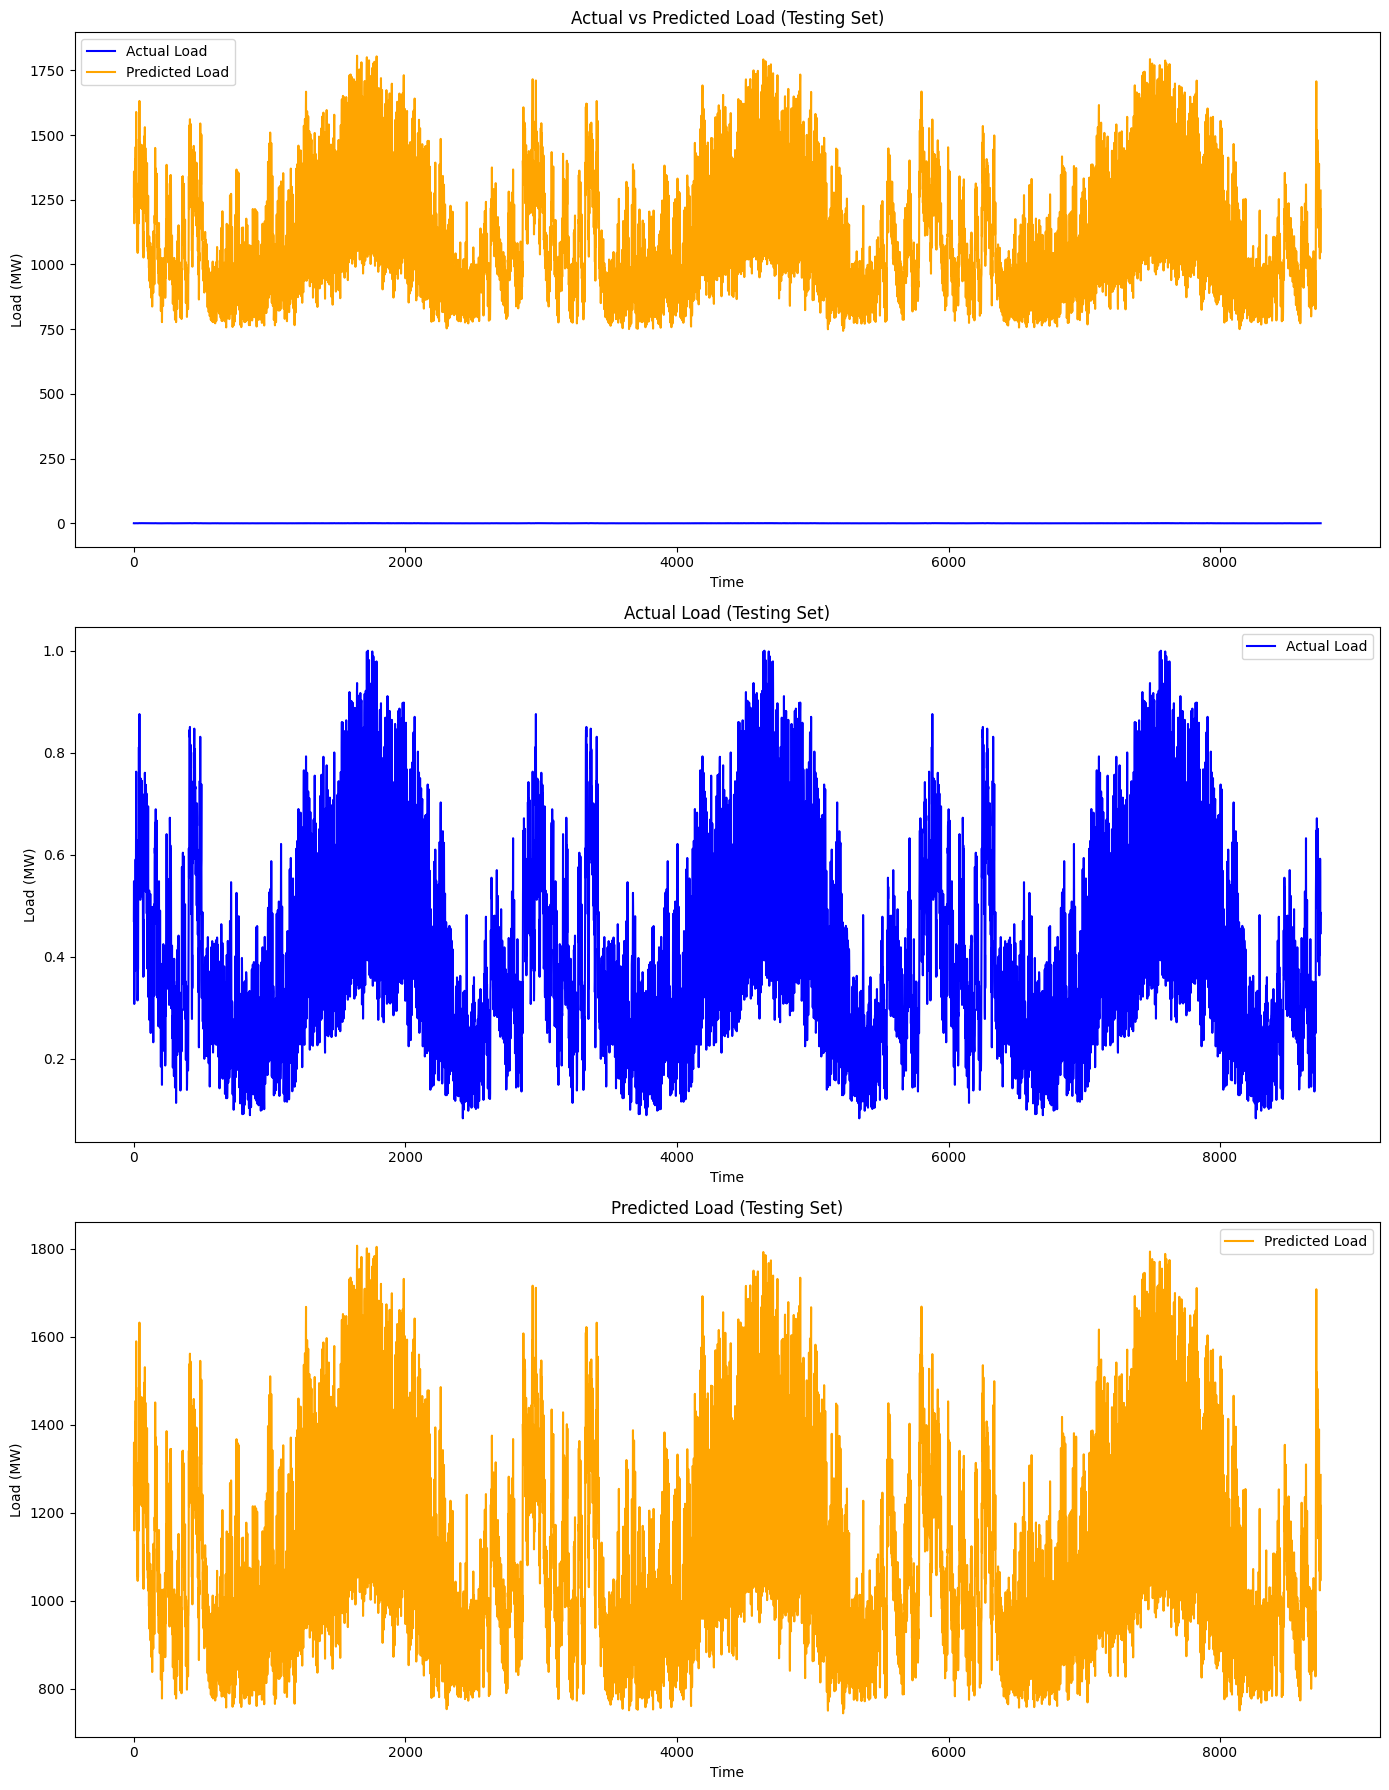

In [ ]:
# Evaluate model
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# Plotting the results
plt.figure(figsize=(14, 18))
plt.subplot(3, 1, 1)
plt.plot(y_test, label='Actual Load', color='blue')
plt.plot(test_predictions, label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(y_test, label='Actual Load', color='blue')
plt.title('Actual Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(test_predictions, label='Predicted Load', color='orange')
plt.title('Predicted Load (Testing Set)')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# import tensorflow as tf

# # Exclude the datetime and target columns before scaling
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_features = scaler.fit_transform(merged_data.drop(columns=['Hour_End', target]))

# # Convert scaled features back to DataFrame and re-include the 'Hour_End' and target columns
# scaled_data = pd.DataFrame(scaled_features, columns=merged_data.columns.drop(['Hour_End', target]))
# scaled_data[target] = merged_data[target].values
# scaled_data['Hour_End'] = merged_data['Hour_End'].values

# # Print dtype of all columns
# print(scaled_data.dtypes)
# scaled_data.head(5)

# # Ensure all data is of type float64
# scaled_data = scaled_data.astype(np.float64)

# # Function to create sequences
# def create_sequences(data, time_steps, target):
#     X, y = [], []
#     for i in range(len(data) - time_steps):
#         X.append(data.iloc[i:i + time_steps].drop(columns=[target]).values)
#         y.append(data.iloc[i + time_steps][target])
#     return np.array(X), np.array(y)

# # Assuming scaled_data is already defined and contains the necessary data
# time_steps = 18  # Example time steps
# X, y = create_sequences(scaled_data, time_steps, target)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Ensure all data is of type float64
# X_train = X_train.astype(np.float64)
# X_test = X_test.astype(np.float64)
# y_train = y_train.astype(np.float64)
# y_test = y_test.astype(np.float64)

# # Define the model
# model = Sequential()
# model.add(LSTM(55, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
# model.add(Dense(1))  # Output layer for load prediction

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions
# train_predictions = model.predict(X_train)
# test_predictions = model.predict(X_test)

# # Evaluate model
# train_mae = mean_absolute_error(y_train, train_predictions)
# test_mae = mean_absolute_error(y_test, test_predictions)
# train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
# test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
# train_r2 = r2_score(y_train, train_predictions)
# test_r2 = r2_score(y_test, test_predictions)

# print(f'Training MAE: {train_mae}, RMSE: {train_rmse}, R²: {train_r2}')
# print(f'Testing MAE: {test_mae}, RMSE: {test_rmse}, R²: {test_r2}')

# # Plotting the results
# plt.figure(figsize=(14, 18))
# plt.subplot(3, 1, 1)
# plt.plot(y_test, label='Actual Load', color='blue')
# plt.plot(test_predictions, label='Predicted Load', color='orange')
# plt.title('Actual vs Predicted Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()
# plt.subplot(3, 1, 2)
# plt.plot(y_test, label='Actual Load', color='blue')
# plt.title('Actual Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()
# plt.subplot(3, 1, 3)
# plt.plot(test_predictions, label='Predicted Load', color='orange')
# plt.title('Predicted Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
# # Step 8: Plot the results in separate subplots
# plt.figure(figsize=(14, 18))

# # Plot overlapping actual and predicted load
# plt.subplot(3, 1, 1)
# plt.plot(scaled_y_test, label='Actual Load', color='blue')
# plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
# plt.title('Actual vs Predicted Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()

# # Plot actual load
# plt.subplot(3, 1, 2)
# plt.plot(scaled_y_test, label='Actual Load', color='blue')
# plt.title('Actual Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()

# # Plot predicted load
# plt.subplot(3, 1, 3)
# plt.plot(scaled_test_predictions, label='Predicted Load', color='orange')
# plt.title('Predicted Load (Testing Set)')
# plt.xlabel('Time')
# plt.ylabel('Load (MW)')
# plt.legend()

# plt.tight_layout()
# plt.show()